In [1]:
import os
import numpy as np
import tensorflow as tf
import random

from utils.data_loader import get_train_test, get_train_test_fashion
from utils.openmax import create_model, get_activations, compute_openmax
from utils.openmax_utils import image_show, get_openmax_predict

2024-03-31 13:48:05.484034: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 13:48:05.484057: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 13:48:05.484710: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 13:48:05.488334: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 13:48:06.097462: W tensorflow/compiler/tf2

In [2]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-03-31 13:48:07.011963: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-31 13:48:07.025526: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-31 13:48:07.025670: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPU


2024-03-31 13:48:07.034947: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-31 13:48:07.035087: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-31 13:48:07.035189: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
SEED = 0
IMG_DIM = 28

In [5]:
random.seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [6]:
model = tf.keras.models.load_model('models/mnist.h5')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [8]:
fit_data, _ = get_train_test(training=True)

In [9]:
create_model(model, fit_data) # Only need to run this once

  72/1563 [>.............................] - ETA: 1s  

2024-03-31 13:48:07.616311: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


1563/1563 [==============================] - 1s 691us/step


1/1 [==============================] - 0s 44ms/step
SoftMax Sum: 0.9999999403953552
OpenMax Sum: 1.0000000000000002
True Label: 7
SoftMax Label: 7
OpenMax Label: 7


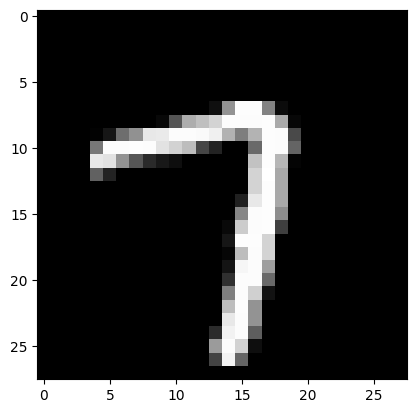

1/1 [==============================] - 0s 44ms/step
SoftMax Sum: 1.0000001192092896
OpenMax Sum: 0.9999999999999999
True Label: 1
SoftMax Label: 1
OpenMax Label: 1


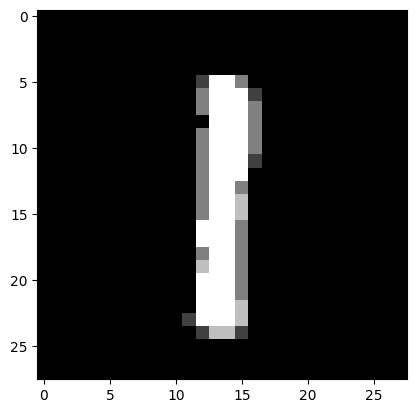

1/1 [==============================] - 0s 44ms/step
SoftMax Sum: 0.9999999403953552
OpenMax Sum: 1.0
True Label: 3
SoftMax Label: 3
OpenMax Label: 3


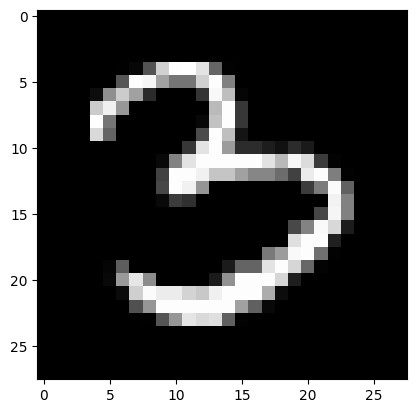

1/1 [==============================] - 0s 46ms/step
SoftMax Sum: 1.0
OpenMax Sum: 0.9999999999999998
True Label: 6
SoftMax Label: 6
OpenMax Label: 6


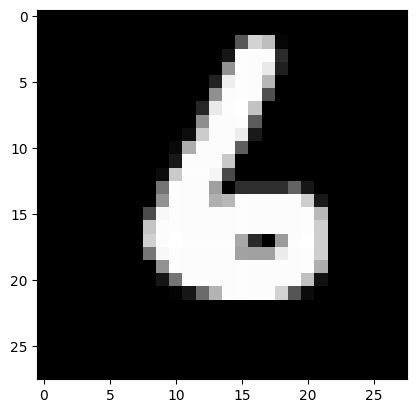

1/1 [==============================] - 0s 48ms/step
SoftMax Sum: 1.0
OpenMax Sum: 0.9999999999999999
True Label: 8
SoftMax Label: 8
OpenMax Label: 8


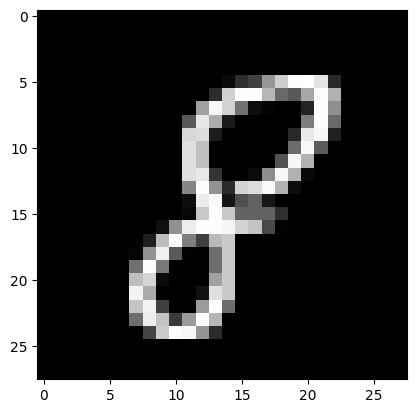

In [12]:
(x_test, y_test) = get_train_test(training=False)

for i in range(5):
    random_char = np.random.randint(0, len(x_test))

    test_x1 = x_test[random_char]
    test_y1 = y_test[random_char]

    logits, softmax = get_activations(
        test_x1.reshape(-1, IMG_DIM, IMG_DIM, 1), model)

    openmax, _ = compute_openmax(logits)
    print(f'SoftMax Sum: {np.sum(softmax)}')
    print(f'OpenMax Sum: {np.sum(openmax)}')
    print(f'True Label: {test_y1}')
    print(f'SoftMax Label: {np.argmax(softmax)}')
    print(f'OpenMax Label: {get_openmax_predict(openmax)}')
    image_show(test_x1)

1/1 [==============================] - 0s 45ms/step
SoftMax Sum: 1.0000001192092896
OpenMax Sum: 1.0
True Label: 10
SoftMax Label: 2
OpenMax Label: 10


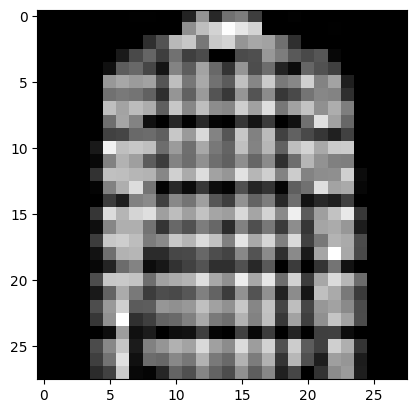

1/1 [==============================] - 0s 44ms/step
SoftMax Sum: 1.0
OpenMax Sum: 1.0
True Label: 10
SoftMax Label: 5
OpenMax Label: 10


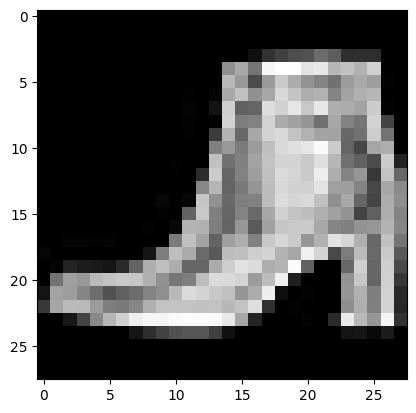

1/1 [==============================] - 0s 46ms/step
SoftMax Sum: 1.0000001192092896
OpenMax Sum: 0.9999999999999998
True Label: 10
SoftMax Label: 2
OpenMax Label: 10


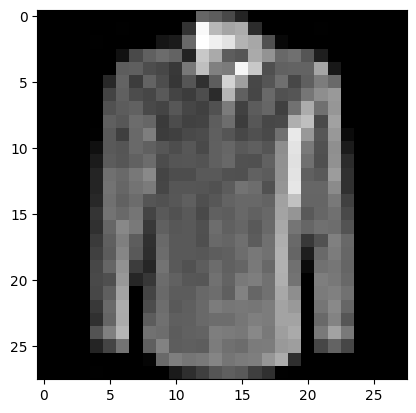

1/1 [==============================] - 0s 46ms/step
SoftMax Sum: 1.0
OpenMax Sum: 1.0
True Label: 10
SoftMax Label: 9
OpenMax Label: 10


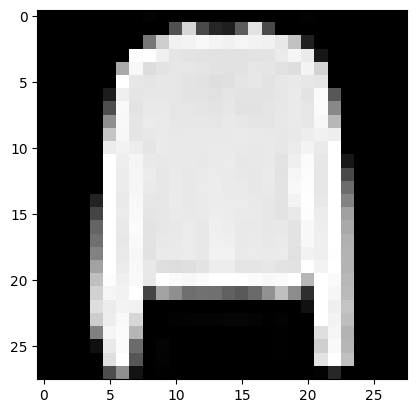

1/1 [==============================] - 0s 45ms/step
SoftMax Sum: 1.0
OpenMax Sum: 1.0
True Label: 10
SoftMax Label: 3
OpenMax Label: 10


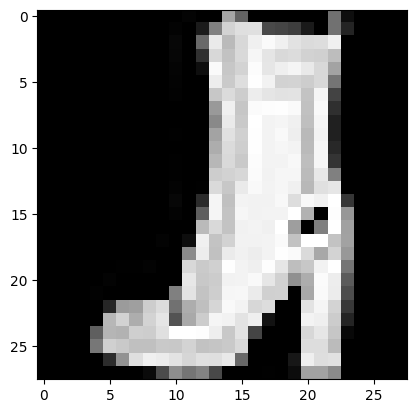

In [13]:
(x_test, _) = get_train_test_fashion(training=False)

for i in range(5):
    random_char = np.random.randint(0, len(x_test))

    test_x1 = x_test[random_char]

    logits, softmax = get_activations(
        test_x1.reshape(-1, IMG_DIM, IMG_DIM, 1), model)

    openmax, _ = compute_openmax(logits)
    print(f'SoftMax Sum: {np.sum(softmax)}')
    print(f'OpenMax Sum: {np.sum(openmax)}')
    print(f'True Label: 10')
    print(f'SoftMax Label: {np.argmax(softmax)}')
    print(f'OpenMax Label: {get_openmax_predict(openmax)}')
    image_show(test_x1)